In [1]:
!pip install numpy==1.23.4

In [2]:
!pip install -U threadpoolctl

In [3]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('mall customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace=True)

In [8]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df = df.drop('CustomerID' , axis=1)

In [10]:
df.describe()

,Age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# viz

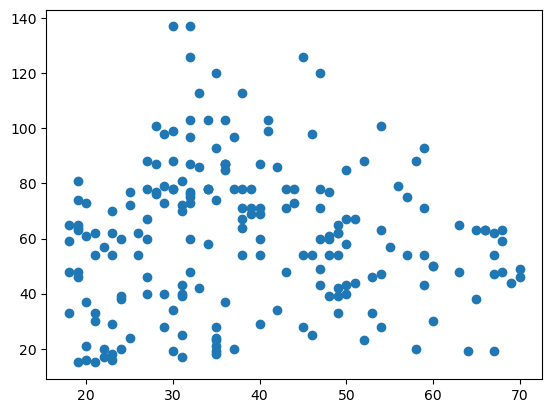

In [11]:
plt.scatter(df['Age'] , df.income)

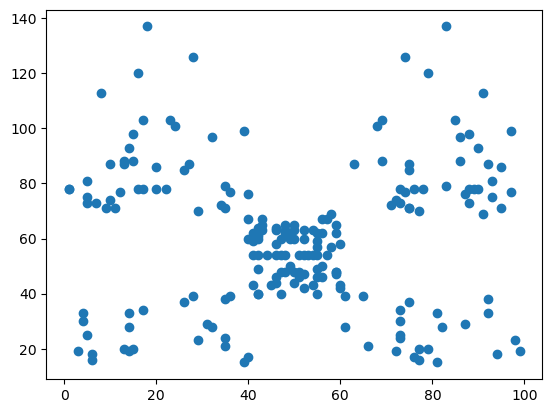

In [12]:
plt.scatter(df['score'], df.income)

# pairplot

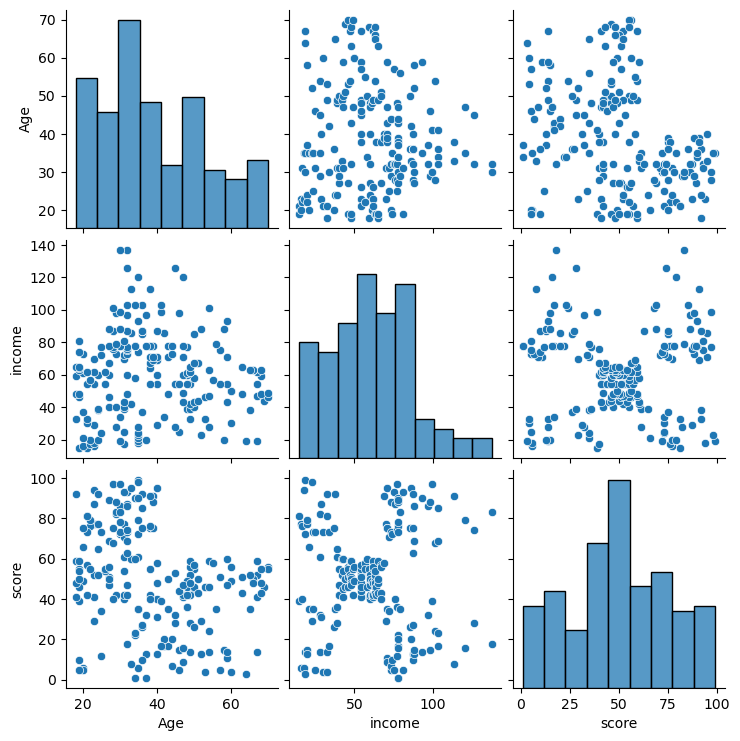

In [13]:
seaborn.pairplot(df[[ 'Age', 'income', 'score']])

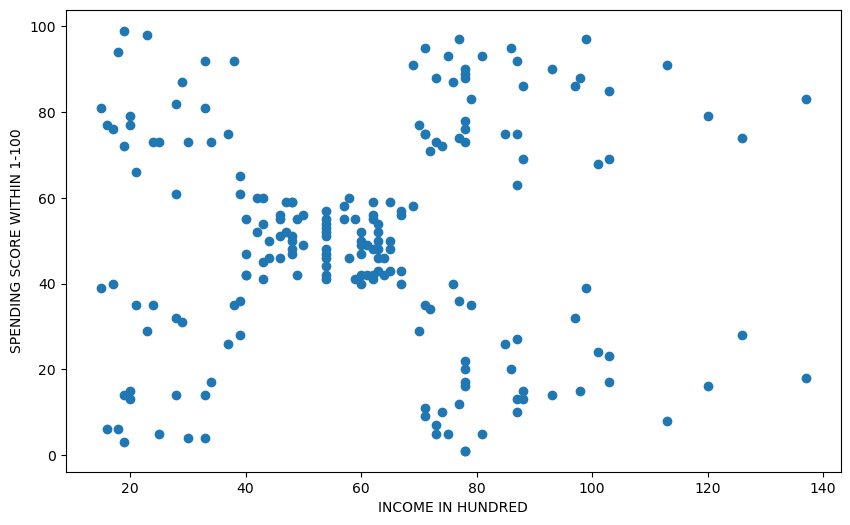

In [14]:
plt.figure(figsize =(10,6))
plt.xlabel('INCOME IN HUNDRED')
plt.ylabel('SPENDING SCORE WITHIN 1-100')
plt.scatter(df.income, df.score)

# KMeans Cluster

In [15]:
from sklearn.cluster import KMeans

In [16]:
km1 = KMeans() # n_clusters=8

In [17]:
predicted = km1.fit_predict(df[['income', 'score']]) #fit_predict(df[['income', 'score', 'Age','ho jo bo ro lo']])

In [18]:
predicted

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 5, 3, 5, 5,
       0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 5, 5, 5, 5,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 6, 2, 6, 2,
       1, 2, 6, 2, 6, 2, 6, 2, 6, 2, 1, 2, 6, 2, 1, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 2, 6, 2, 1, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 2, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7,
       4, 7])

In [19]:
df['initial_clusters'] =  predicted

In [20]:
df.head()

,Gender,Age,income,score,initial_clusters
0,Male,19,15,39,0
1,Male,21,15,81,3
2,Female,20,16,6,0
3,Female,23,16,77,3
4,Female,31,17,40,0


In [21]:
center1 = km1.cluster_centers_

In [22]:
center1

array([[ 25.14285714,  19.52380952],
       [ 63.72093023,  46.1627907 ],
       [ 78.55172414,  82.17241379],
       [ 25.0952381 ,  80.04761905],
       [109.7       ,  22.        ],
       [ 47.29545455,  51.40909091],
       [ 80.18181818,  12.68181818],
       [109.7       ,  82.        ]])

In [23]:
km1.predict([[15,45]])

array([0])

# 2D VIZ

In [24]:
df0 = df[df.initial_clusters == 0]
df1 = df[df.initial_clusters == 1]
df2 = df[df.initial_clusters == 2]
df3 = df[df.initial_clusters == 3]
df4 = df[df.initial_clusters == 4]
df5 = df[df.initial_clusters == 5]
df6 = df[df.initial_clusters == 6]
df7 = df[df.initial_clusters == 7]

In [25]:
df0.shape

(21, 5)

In [26]:
df1.shape

(43, 5)

In [27]:
df7.shape

(10, 5)

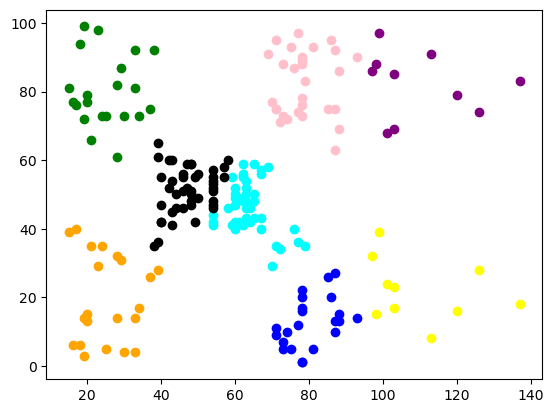

In [28]:
plt.scatter(df0['income'], df0['score'], color='orange',label='Cluster 0')
plt.scatter(df1['income'], df1['score'], color='cyan',label='Cluster 1')
plt.scatter(df2['income'], df2['score'], color='pink',label='Cluster 2')
plt.scatter(df3['income'], df3['score'], color='green',label='Cluster 3')
plt.scatter(df4['income'], df4['score'], color='yellow',label='Cluster 4')
plt.scatter(df5['income'], df5['score'], color='black',label='Cluster 5')
plt.scatter(df6['income'], df6['score'], color='blue',label='Cluster 6')
plt.scatter(df7['income'], df7['score'], color='purple',label='Cluster 7')

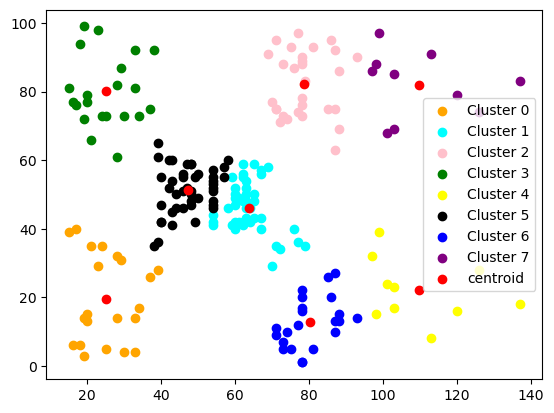

In [29]:
# plt.figure(figsize=(15,10))

plt.scatter(df0['income'], df0['score'], color='orange',label='Cluster 0')
plt.scatter(df1['income'], df1['score'], color='cyan',label='Cluster 1')
plt.scatter(df2['income'], df2['score'], color='pink',label='Cluster 2')
plt.scatter(df3['income'], df3['score'], color='green',label='Cluster 3')
plt.scatter(df4['income'], df4['score'], color='yellow',label='Cluster 4')
plt.scatter(df5['income'], df5['score'], color='black',label='Cluster 5')
plt.scatter(df6['income'], df6['score'], color='blue',label='Cluster 6')
plt.scatter(df7['income'], df7['score'], color='purple',label='Cluster 7')

#centroids
plt.scatter(center1[:,0], center1[:,1], color='red', label='centroid')

plt.legend()

# Optimization

In [30]:
#Elbow method
#WCSS - Within Clusters Sum of Squares

In [31]:
wcss = []
cluster = range(1,20)

for k in cluster:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['income', 'score']])
    wcss.append(km2.inertia_)

In [32]:
wcss

[269981.28,
 183069.17582751293,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30227.606513152015,
 24986.52564064288,
 21818.11458845218,
 19634.554629349976,
 17515.872164701657,
 16055.116776072386,
 14410.017119350185,
 12785.790446336036,
 11640.112000980029,
 10853.593442084231,
 10319.004309167673,
 9629.440284715285,
 8554.756089400795]

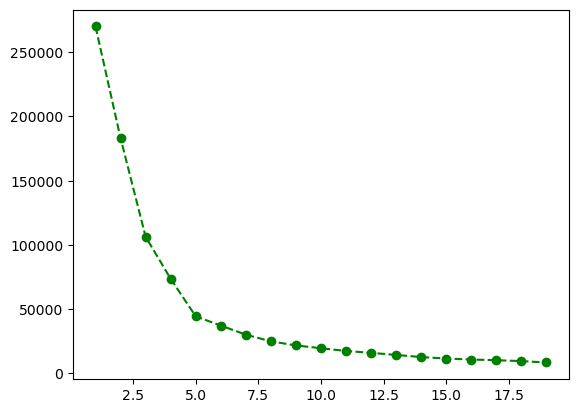

In [33]:
plt.plot(cluster, wcss,'go--')

In [34]:
!pip install kneed

In [35]:
from kneed import KneeLocator

In [36]:
kn = KneeLocator(cluster, wcss, curve='convex',direction='decreasing')

In [37]:
kn.knee

5

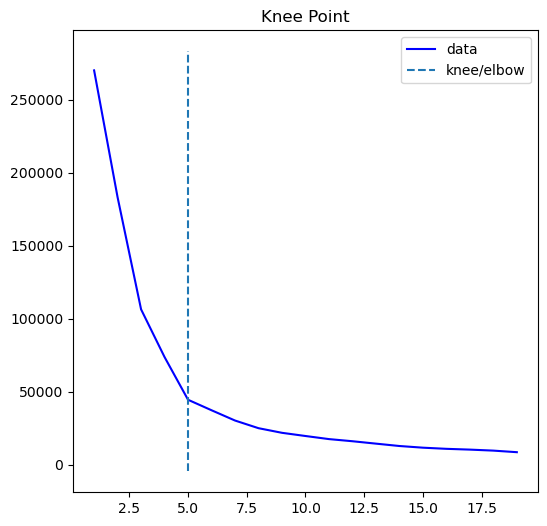

In [38]:
kn.plot_knee()

# After

In [39]:
km3 = KMeans(n_clusters=5)
predicted = km3.fit_predict(df[['income', 'score']]) #fit_predict(df[['income', 'score', 'Age','ho jo bo ro lo']])

In [40]:
df['initial_clusters'] = predicted

In [41]:
center1 = km3.cluster_centers_

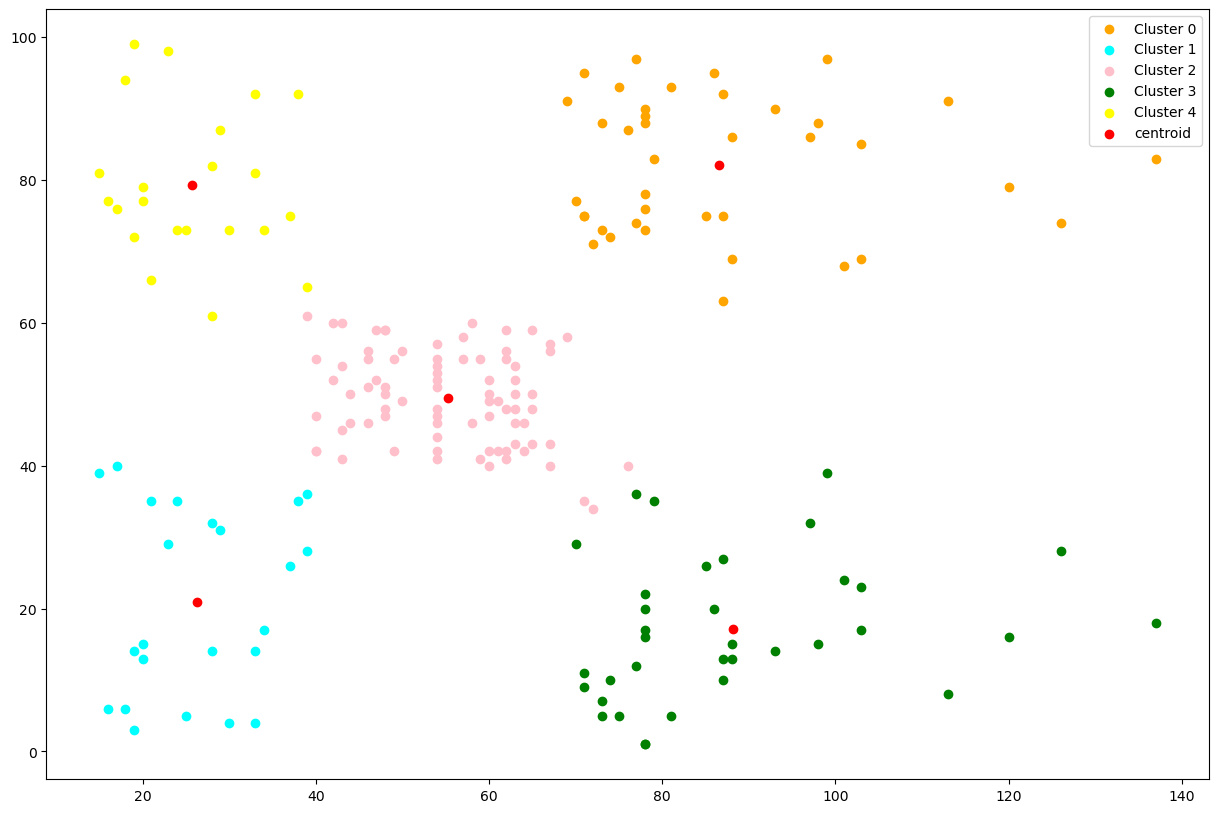

In [42]:
plt.figure(figsize=(15,10))

df0 = df[df.initial_clusters == 0]
df1 = df[df.initial_clusters == 1]
df2 = df[df.initial_clusters == 2]
df3 = df[df.initial_clusters == 3]
df4 = df[df.initial_clusters == 4]

plt.scatter(df0['income'], df0['score'], color='orange',label='Cluster 0')
plt.scatter(df1['income'], df1['score'], color='cyan',label='Cluster 1')
plt.scatter(df2['income'], df2['score'], color='pink',label='Cluster 2')
plt.scatter(df3['income'], df3['score'], color='green',label='Cluster 3')
plt.scatter(df4['income'], df4['score'], color='yellow',label='Cluster 4')

#centroids
plt.scatter(center1[:,0], center1[:,1], color='red', label='centroid')

plt.legend()